<a href="https://colab.research.google.com/github/NazaninSaadatMoghaddam1993/Titanik_kaggle_competition/blob/main/titanic_analysis_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Content

1.   [Data Description](#-1.-Data-Description)
2.   [Age](#-2.-Age)
3.   [PClass](#3.-Pclass)
4.   [Fare](#-4.-fare)
5.   [Sibsp and Parch](#-5.-sibsp-and-parch)
6.   [Embarked cities ](#-6.-embarked-cities )
7.   [Correlation matrix](#-7.-correlation-Matrix)







In [2]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/titanik

/content/drive/MyDrive/titanik


# 1. Data Description

In [4]:
# @title Reading data
data_f = pd.read_csv('train.csv')

In [5]:
# @title Length of data
len(data_f)

891

In [6]:
# @title Data
data_f.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [7]:
# @title Description
data_f.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# @title count NaNs for each column
nan_counts = data_f.isna().sum()
nan_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# There are multiple NaN values in the 'Age' and 'Cabin' columns, while the other columns do not experience this issue.
### I substituted nans in age with the mean and had nothing to do with the cabin

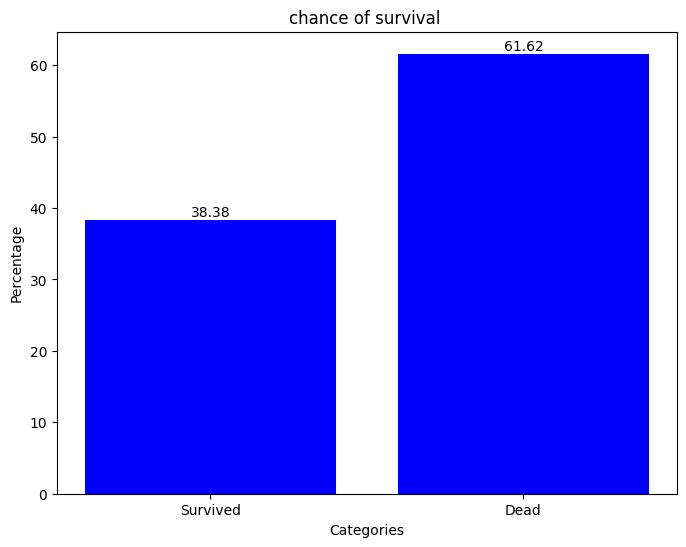

In [9]:
# @title Chance of Survival
categories = ['Survived', 'Dead']
values = [len(data_f[data_f['Survived']==1]), len(data_f[data_f['Survived']==0])]  # These are counts or values, not percentages

# Calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color='blue')

# Add percentages as text on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('chance of survival ')

# Show the chart
plt.show()

# 2. Age

<ipython-input-11-585b50e70c83>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=data_f['Age'].dropna(), palette="muted", ax=axes[0])
<ipython-input-11-585b50e70c83>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=data_f[data_f['Survived']==1]['Age'].dropna(), palette="muted", ax=axes[1])
<ipython-input-11-585b50e70c83>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=data_f[data_f['Survived']==0]['Age'].dropna(), palette="muted", ax=axes[2])


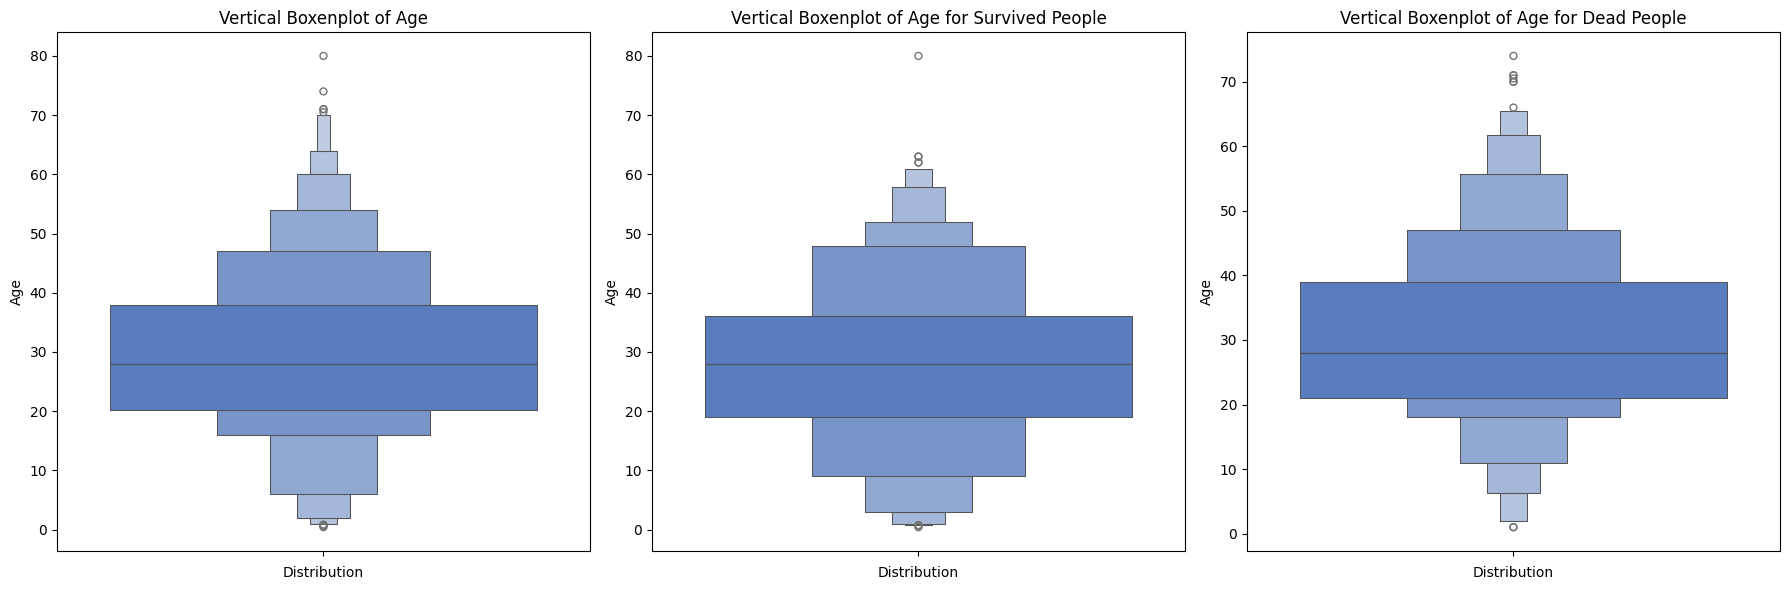

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot of Age
sns.boxenplot(y=data_f['Age'].dropna(), palette="muted", ax=axes[0])
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Distribution')
axes[0].set_title('Vertical Boxenplot of Age')

# Boxplot of Age for Survived People
sns.boxenplot(y=data_f[data_f['Survived']==1]['Age'].dropna(), palette="muted", ax=axes[1])
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Distribution')
axes[1].set_title('Vertical Boxenplot of Age for Survived People')

# Boxplot of Age for Dead People
sns.boxenplot(y=data_f[data_f['Survived']==0]['Age'].dropna(), palette="muted", ax=axes[2])
axes[2].set_ylabel('Age')
axes[2].set_xlabel('Distribution')
axes[2].set_title('Vertical Boxenplot of Age for Dead People')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-13-597063416894>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=data_f[data_f['Survived']==1]['Age'].dropna(), palette="muted")


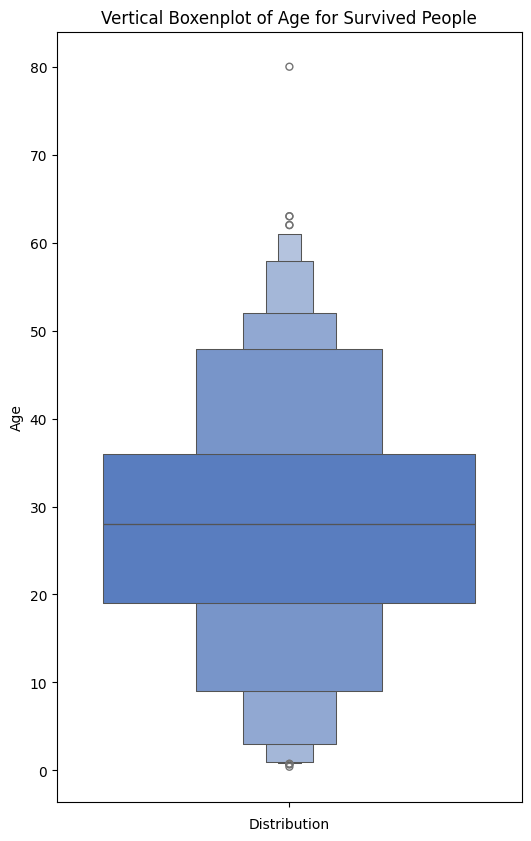

In [13]:
# @title BoxPlot of Age for survived peoples
plt.figure(figsize=(6, 10))
sns.boxenplot(y=data_f[data_f['Survived']==1]['Age'].dropna(), palette="muted")
plt.ylabel('Age')
plt.xlabel('Distribution')
plt.title('Vertical Boxenplot of Age for Survived People')
plt.show()

<ipython-input-22-406b26cb6570>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=data_f[data_f['Survived']==0]['Age'].dropna(), palette="muted")


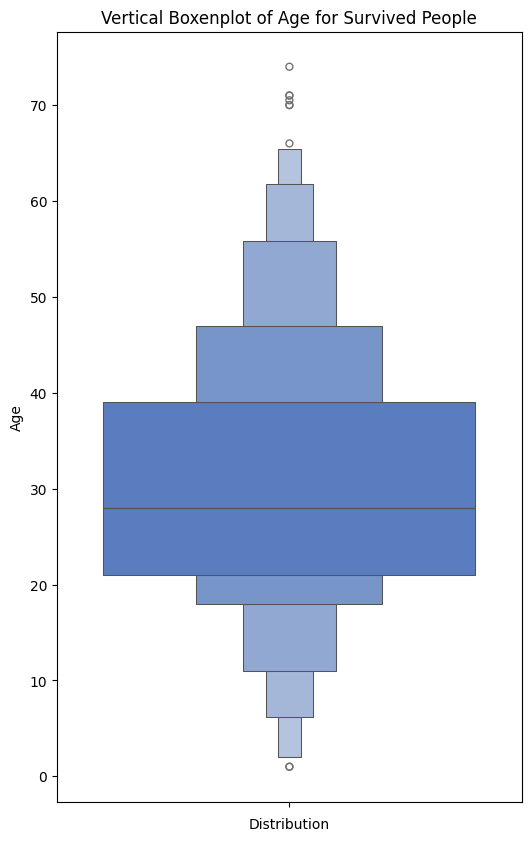

In [22]:
# @title BoxPlot of Age for survived peoples
plt.figure(figsize=(6, 10))
sns.boxenplot(y=data_f[data_f['Survived']==0]['Age'].dropna(), palette="muted")
plt.ylabel('Age')
plt.xlabel('Distribution')
plt.title('Vertical Boxenplot of Age for Survived People')
plt.show()

#sex

<ipython-input-17-85684b6c7ca7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data_f[data_f['Pclass'] == pclass], ax=axes[i], palette=colors)
<ipython-input-17-85684b6c7ca7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data_f[data_f['Pclass'] == pclass], ax=axes[i], palette=colors)
<ipython-input-17-85684b6c7ca7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data_f[data_f['Pclass'] == pclass], ax=axes[i], palette=colors)


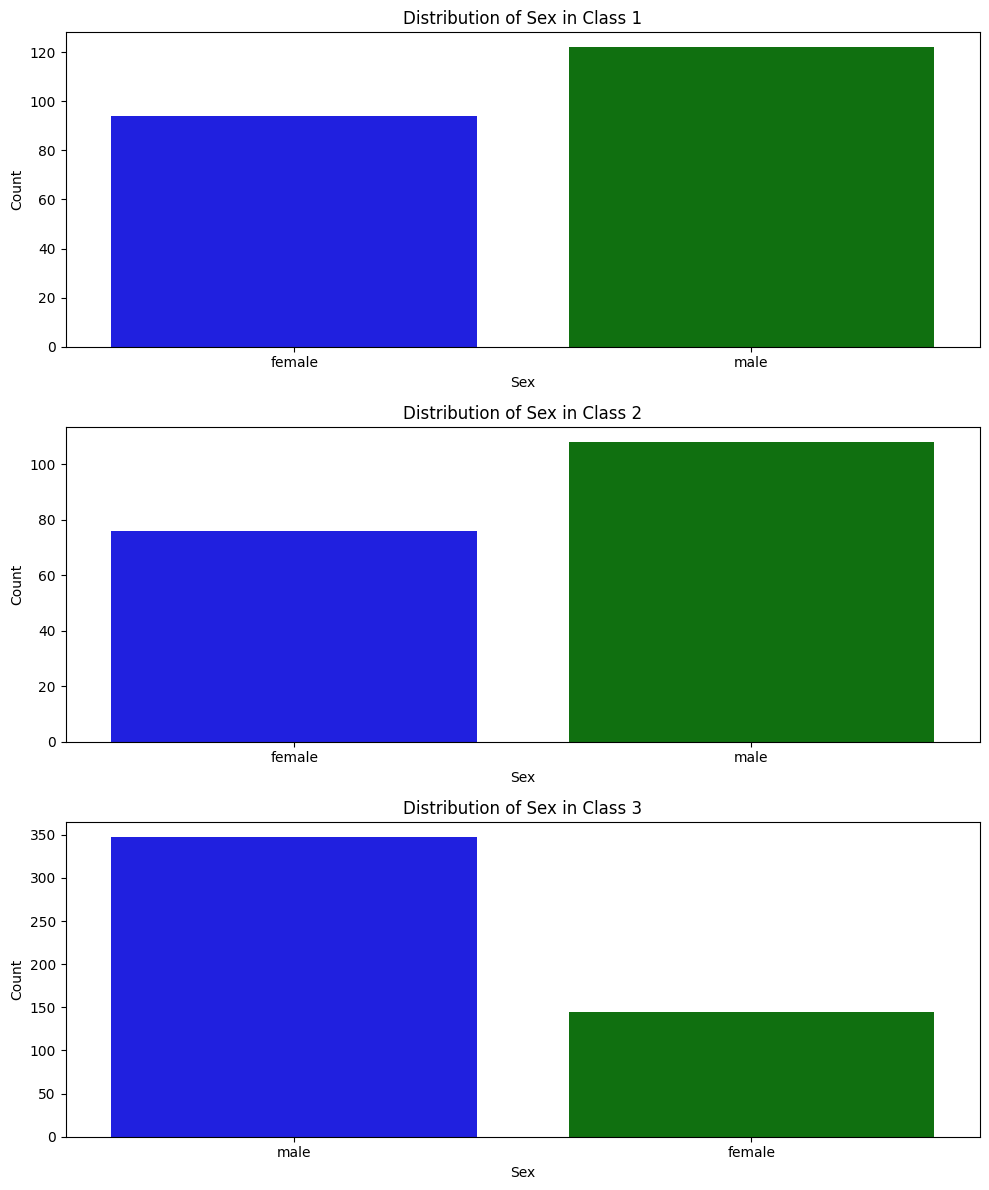

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom colors
colors = ["blue", "green"]  # Specify blue and green colors

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot histograms for each class
for i, pclass in enumerate([1, 2, 3]):
    sns.countplot(x='Sex', data=data_f[data_f['Pclass'] == pclass], ax=axes[i], palette=colors)
    axes[i].set_title(f'Distribution of Sex in Class {pclass}')
    axes[i].set_ylabel("Count")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-19-acdc1571c4f8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data_f[data_f['Survived'] == 1], palette=colors)


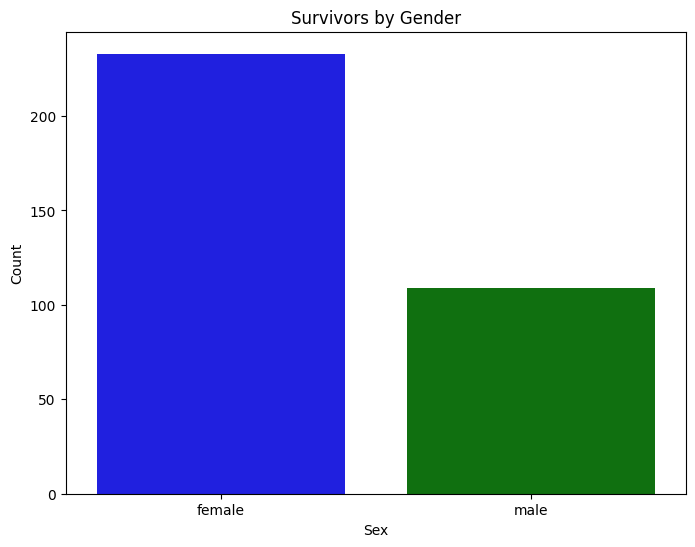

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom colors
colors = ["blue", "green"]  # Specify blue and green colors

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data_f[data_f['Survived'] == 1], palette=colors)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survivors by Gender')

# Show the plot
plt.show()


<ipython-input-21-3dc40a2096d6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_by_gender.index, y=survived_by_gender.values, palette=['blue', 'green'])


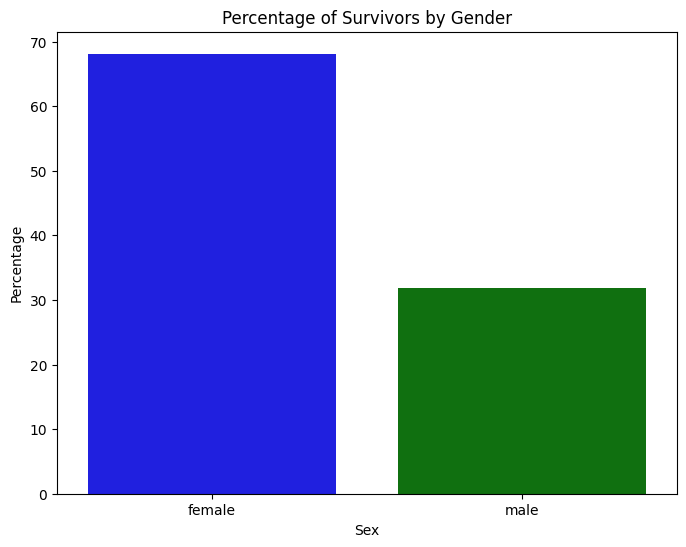

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of survivors by gender
total_survived = len(data_f[data_f['Survived'] == 1])
survived_by_gender = data_f[data_f['Survived'] == 1]['Sex'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_by_gender.index, y=survived_by_gender.values, palette=['blue', 'green'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Survivors by Gender')

# Show the plot
plt.show()


#3. Pclass

<ipython-input-12-4c383a48d63b>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])


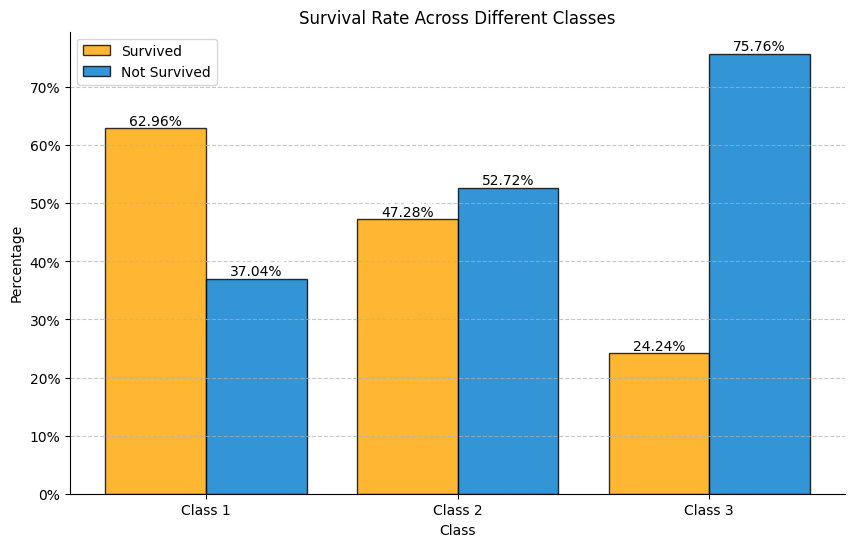

In [ ]:
# @title Survival Rate Across Different Classes
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Class 1', 'Class 2', 'Class 3']
survived_values = [
    len(data_f[(data_f['Pclass'] == 1) & (data_f['Survived'] == 1)]) / len(data_f[data_f['Pclass'] == 1]),
    len(data_f[(data_f['Pclass'] == 2) & (data_f['Survived'] == 1)]) / len(data_f[data_f['Pclass'] == 2]),
    len(data_f[(data_f['Pclass'] == 3) & (data_f['Survived'] == 1)]) / len(data_f[data_f['Pclass'] == 3])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.4

# Set a custom color palette (orange and blue)
colors = ['#FFA500', '#007ACC']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with rounded corners
bars1 = ax.bar(x - width/2, survived_values, width, label='Survived', color=colors[0], edgecolor='black', linewidth=1, alpha=0.8)
bars2 = ax.bar(x + width/2, not_survived_values, width, label='Not Survived', color=colors[1], edgecolor='black', linewidth=1, alpha=0.8)

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Percentage')
ax.set_title('Survival Rate Across Different Classes')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add data labels on top of the bars with white background
for bars, values in zip([bars1, bars2], [survived_values, not_survived_values]):
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='black')
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='white', weight='bold')

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage sign to the y-axis ticks
ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])

# Display the plot
plt.show()


<ipython-input-16-d13d2c2ba6d8>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])


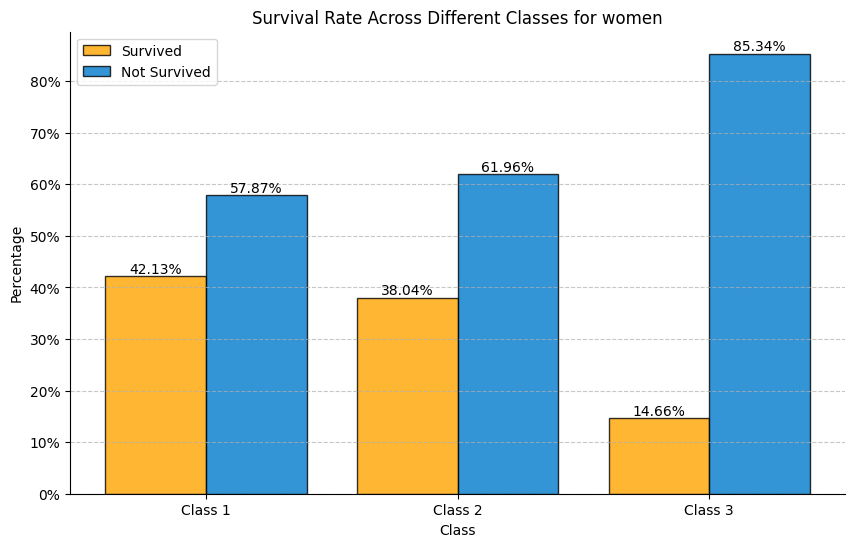

In [ ]:
# @title Survival Rate Across Different Classes for women
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Class 1', 'Class 2', 'Class 3']
survived_values = [
    len(data_f[(data_f['Pclass'] == 1) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'female')])/len(data_f[data_f['Pclass'] == 1]),
    len(data_f[(data_f['Pclass'] == 2) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'female')])/len(data_f[data_f['Pclass'] == 2]),
    len(data_f[(data_f['Pclass'] == 3) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'female')])/len(data_f[data_f['Pclass'] == 3])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.4

# Set a custom color palette (orange and blue)
colors = ['#FFA500', '#007ACC']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with rounded corners
bars1 = ax.bar(x - width/2, survived_values, width, label='Survived', color=colors[0], edgecolor='black', linewidth=1, alpha=0.8)
bars2 = ax.bar(x + width/2, not_survived_values, width, label='Not Survived', color=colors[1], edgecolor='black', linewidth=1, alpha=0.8)

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Percentage')
ax.set_title('Survival Rate Across Different Classes for women')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add data labels on top of the bars with white background
for bars, values in zip([bars1, bars2], [survived_values, not_survived_values]):
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='black')
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='white', weight='bold')

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage sign to the y-axis ticks
ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])

# Display the plot
plt.show()


<ipython-input-15-b1fbcf7f8fa0>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])


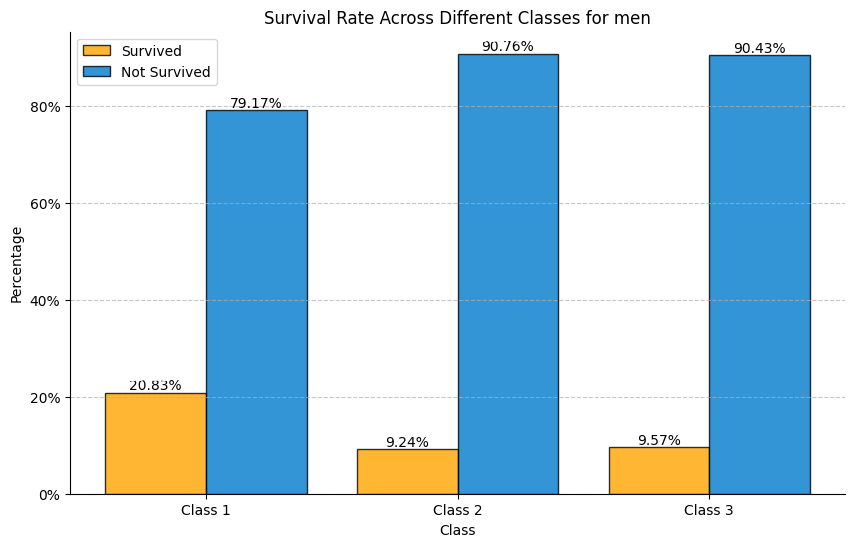

In [ ]:
# @title Survival Rate Across Different Classes for men
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Class 1', 'Class 2', 'Class 3']
survived_values = [
    len(data_f[(data_f['Pclass'] == 1) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'male')])/len(data_f[data_f['Pclass'] == 1]),
    len(data_f[(data_f['Pclass'] == 2) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'male')])/len(data_f[data_f['Pclass'] == 2]),
    len(data_f[(data_f['Pclass'] == 3) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'male')])/len(data_f[data_f['Pclass'] == 3])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.4

# Set a custom color palette (orange and blue)
colors = ['#FFA500', '#007ACC']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with rounded corners
bars1 = ax.bar(x - width/2, survived_values, width, label='Survived', color=colors[0], edgecolor='black', linewidth=1, alpha=0.8)
bars2 = ax.bar(x + width/2, not_survived_values, width, label='Not Survived', color=colors[1], edgecolor='black', linewidth=1, alpha=0.8)

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Percentage')
ax.set_title('Survival Rate Across Different Classes for men')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add data labels on top of the bars with white background
for bars, values in zip([bars1, bars2], [survived_values, not_survived_values]):
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='black')
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='white', weight='bold')

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage sign to the y-axis ticks
ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])

# Display the plot
plt.show()


# 4. fare

<ipython-input-12-f57379628b93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Pclass', y='Fare', data=data_f, palette="viridis")


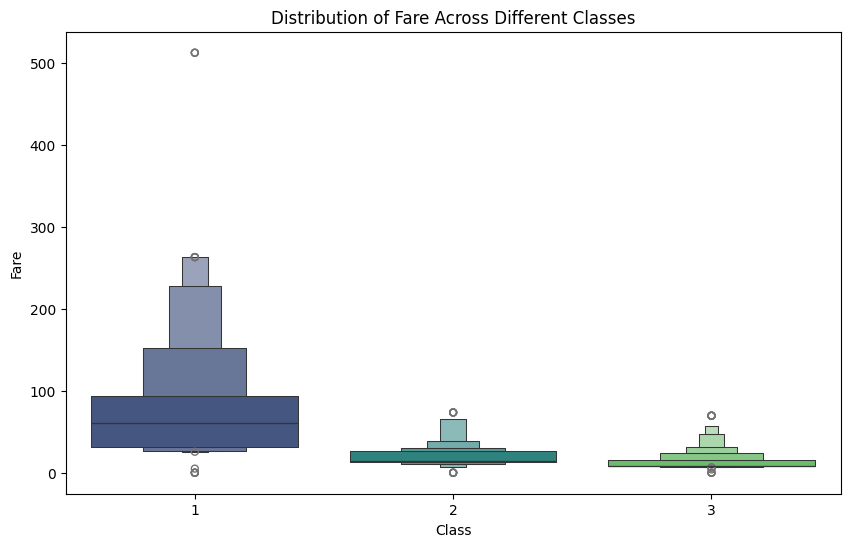

In [ ]:
# @title Distribution of Fare Across Different Classes
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Pclass', y='Fare', data=data_f, palette="viridis")
plt.xlabel('Class')
plt.ylabel('Fare')
plt.title('Distribution of Fare Across Different Classes')
plt.show()

<ipython-input-42-9304071cf34a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fare_means = data_f.groupby('Pclass').mean()['Fare']


Text(0.5, 1.0, 'Mean Fare by Class')

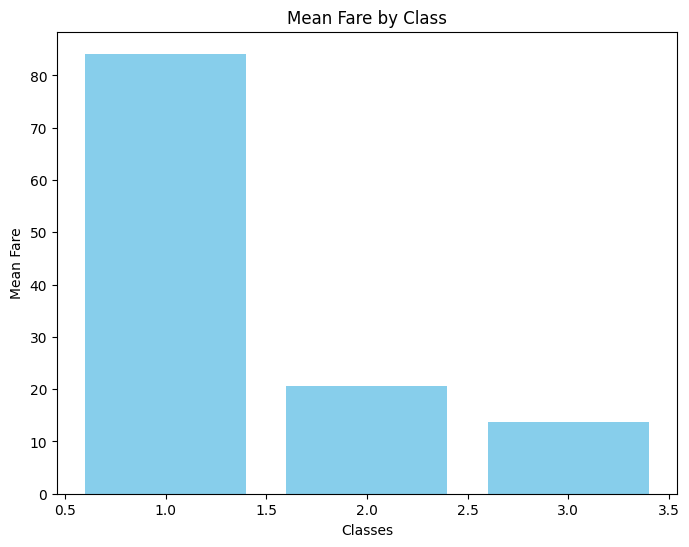

In [ ]:
# @title Mean for ticket price among different classes
fare_means = data_f.groupby('Pclass').mean()['Fare']
plt.figure(figsize=(8, 6))
plt.bar(fare_means.index, fare_means.values, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Mean Fare')
plt.title('Mean Fare by Class')

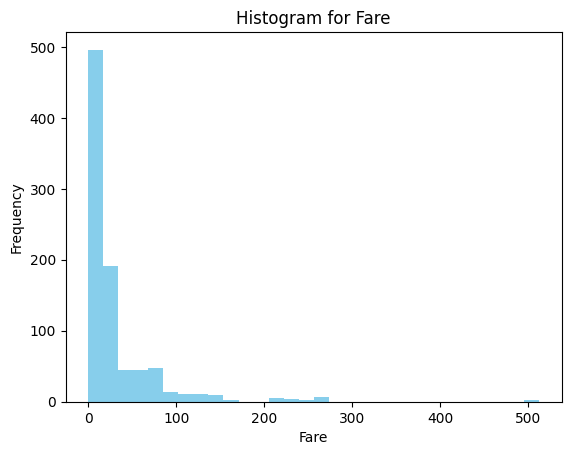

In [ ]:
# @title histogram for fare
plt.hist(data_f['Fare'], 30, color='skyblue')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram for Fare')
plt.show()

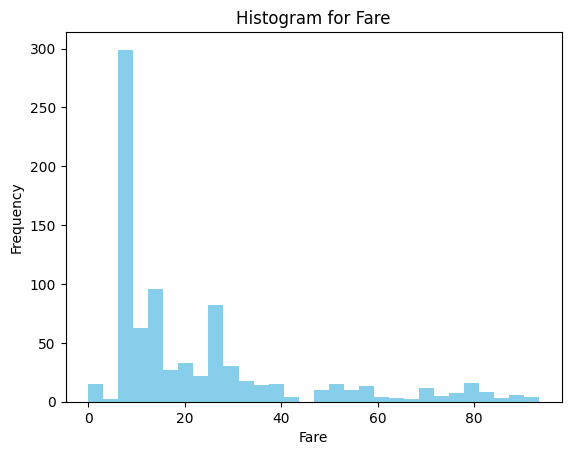

In [ ]:
# @title Histogram for tickets less than 100 dollars
plt.hist(data_f[data_f['Fare']<100]['Fare'], 30, color='skyblue')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram for Fare')
plt.show()


<ipython-input-21-29ae8f037cdf>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])


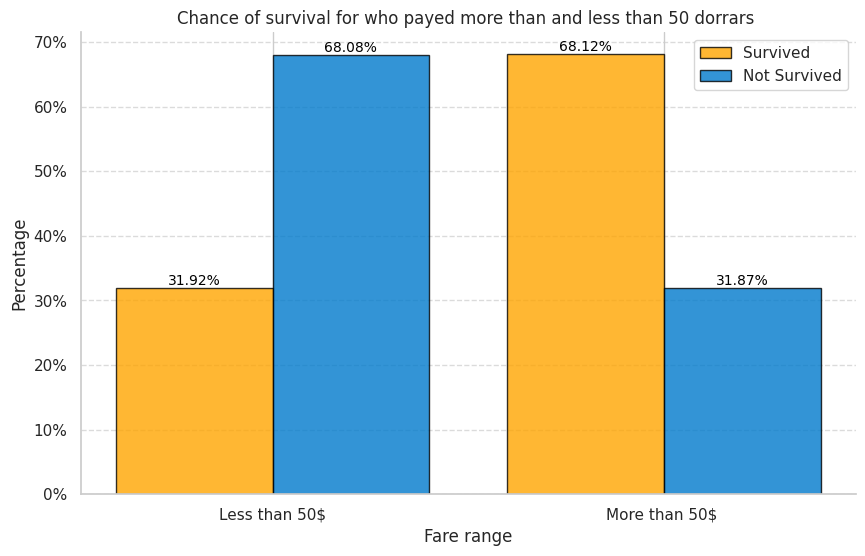

In [ ]:
# @title Chance of survival for people how payed more and less than 50 dollars
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Less than 50$','More than 50$ ']
survived_values = [
    len(data_f[(data_f['Fare']<50)&(data_f['Survived']==1)])/len(data_f[data_f['Fare']<50]),
    len(data_f[(data_f['Fare']>50)&(data_f['Survived']==1)])/len(data_f[data_f['Fare']>50])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.4

# Set a custom color palette (orange and blue)
colors = ['#FFA500', '#007ACC']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with rounded corners
bars1 = ax.bar(x - width/2, survived_values, width, label='Survived', color=colors[0], edgecolor='black', linewidth=1, alpha=0.8)
bars2 = ax.bar(x + width/2, not_survived_values, width, label='Not Survived', color=colors[1], edgecolor='black', linewidth=1, alpha=0.8)

# Add labels and title
ax.set_xlabel('Fare range')
ax.set_ylabel('Percentage')
ax.set_title('Chance of survival for who payed more than and less than 50 dorrars ')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add data labels on top of the bars with white background
for bars, values in zip([bars1, bars2], [survived_values, not_survived_values]):
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='black')
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{round(value*100, 2)}%", ha='center', va='bottom', fontsize=10, color='white', weight='bold')

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage sign to the y-axis ticks
ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])

# Display the plot
plt.show()


# 5. sibsp and parch

Text(0.5, 1.0, 'people how had siblings or spouses on board')

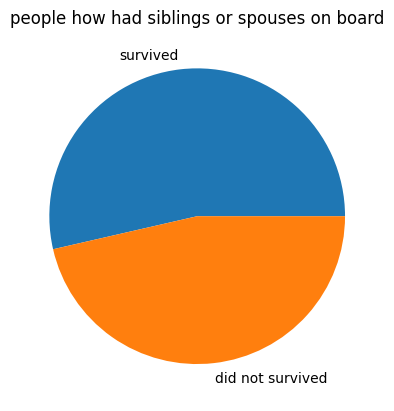

In [ ]:
# @title
A = [len(data_f[(data_f['SibSp']==1)&(data_f['Survived']==1)]),len(data_f[(data_f['SibSp']==1)&(data_f['Survived']==0)])]
plt.pie(A,labels = ['survived','did not survived'])
plt.title('people how had siblings or spouses on board')

In [ ]:
# @title Share of people how had parents or children and survived = 55%
print('share of people how had parents or children and survived',len(data_f[(data_f['Parch']==1)&(data_f['Survived']==1)])/len(data_f[(data_f['Parch']==1)]))

share of people how had parents or children and survived 0.5508474576271186


Text(0.5, 1.0, 'share of people how had parents or children and survived')

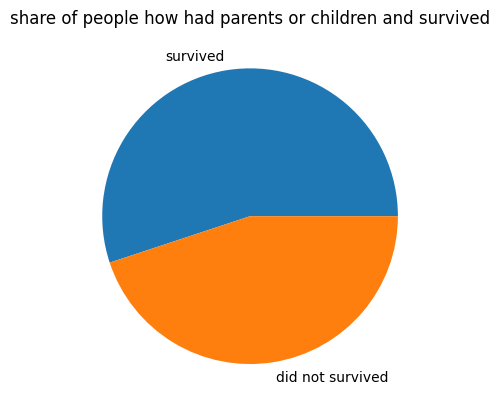

In [ ]:
# @title
A = [len(data_f[(data_f['Parch']==1)&(data_f['Survived']==1)]),len(data_f[(data_f['Parch']==1)&(data_f['Survived']==0)])]
plt.pie(A,labels = ['survived','did not survived'])
plt.title('share of people how had parents or children and survived')

In [ ]:
# @title Share of people how had siblings or spouse or parents or children and survived=88%
print('share of people how had siblings or spouse or parents or children and survived',len(data_f[(data_f['SibSp']==1)|(data_f['Parch']==1)&(data_f['Survived']==1)])/len(data_f[(data_f['Parch']==  1)|(data_f['SibSp']==1)]))

share of people how had siblings or spouse or parents or children and survived 0.8888888888888888


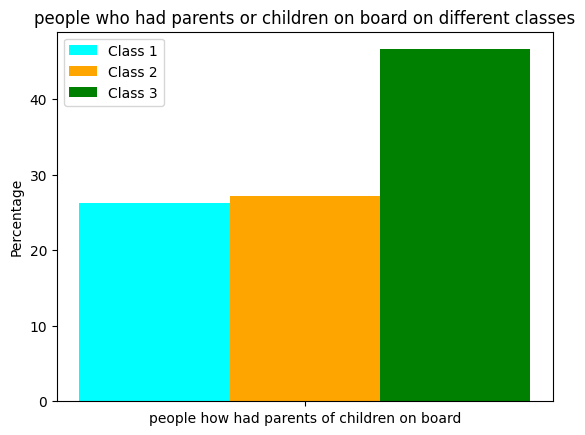

In [ ]:
# @title Passengers who had parents or children on board on different classes
x = np.arange(1)
y1 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==1)])/len(data_f[(data_f['Parch']==1)])*100]
y2 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==2)])/len(data_f[(data_f['Parch']==1)])*100]
y3 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==3)])/len(data_f[(data_f['Parch']==1)])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['people how had parents of children on board'])
plt.title('people who had parents or children on board on different classes')
# plt.xlabel("people who had parents or children on board on different classes","")
plt.ylabel("Percentage")
plt.legend(["Class 1", "Class 2", "Class 3"])
plt.show()

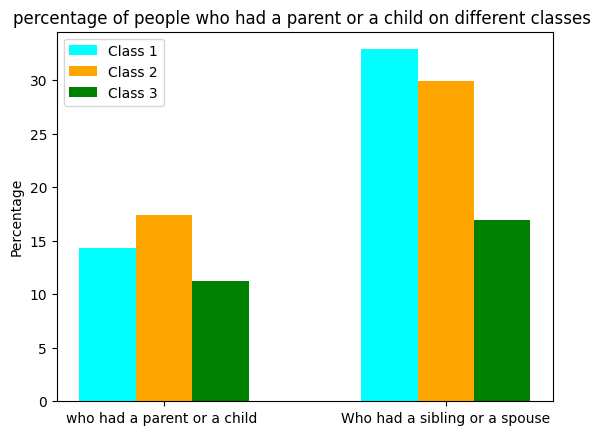

In [ ]:
# @title Percentage of passengers who had a parent or a child on different classes
x = np.arange(2)
y1 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['SibSp']==1)&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100]
y2 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['SibSp']==1)&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100]
y3 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==3)])/len(data_f[(data_f['Pclass']==3)])*100,len(data_f[(data_f['SibSp']==1)&(data_f['Pclass']==3)])/len(data_f[(data_f['Pclass']==3)])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ["who had a parent or a child ","Who had a sibling or a spouse"])
plt.title('percentage of people who had a parent or a child on different classes ')
plt.ylabel("Percentage")
plt.legend(["Class 1", "Class 2", "Class 3"])
plt.show()

# 6. embarked cities

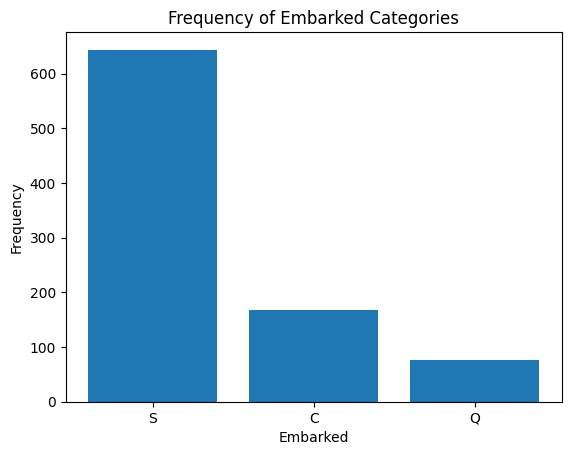

In [ ]:
# @title Number of people embarked from different cities
embarked_counts = data_f['Embarked'].value_counts()
plt.bar(embarked_counts.index, embarked_counts)
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Frequency of Embarked Categories')
plt.show()

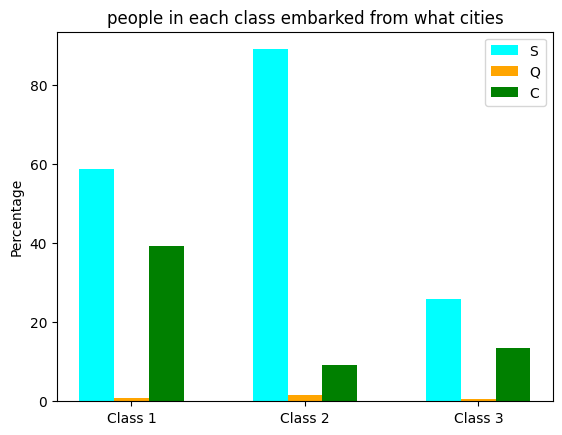

In [ ]:
# @title People in each class embarked from what cities
x = np.arange(3)
y1 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==3)])*100]
y2 = [len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==3)])*100]
y3 = [len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==3)])/len(data_f[(data_f['Pclass']==3)])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ["Class 1", "Class 2", "Class 3"])
plt.title('People in each class embarked from what cities')
plt.ylabel("Percentage")
plt.legend(["S","Q","C"])
plt.show()

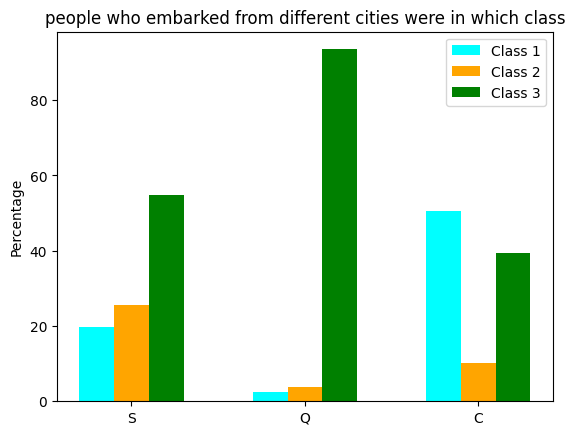

In [ ]:
# @title Passenger Classes based on Embarkation Cities
x = np.arange(3)
y1 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==1)])/len(data_f[(data_f['Embarked']=='S')])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==1)])/len(data_f[(data_f['Embarked']=='Q')])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==1)])/len(data_f[(data_f['Embarked']=='C')])*100]
y2 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==2)])/len(data_f[(data_f['Embarked']=='S')])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==2)])/len(data_f[(data_f['Embarked']=='Q')])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==2)])/len(data_f[(data_f['Embarked']=='C')])*100]
y3 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==3)])/len(data_f[(data_f['Embarked']=='S')])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==3)])/len(data_f[(data_f['Embarked']=='Q')])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==3)])/len(data_f[(data_f['Embarked']=='C')])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ["S","Q","C"])
plt.title('people who embarked from different cities were in which class')
plt.ylabel("Percentage")
plt.legend(["Class 1", "Class 2", "Class 3"])
plt.show()

# 7. correlation Matrix

<ipython-input-8-377bd1ab7591>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_f.corr()


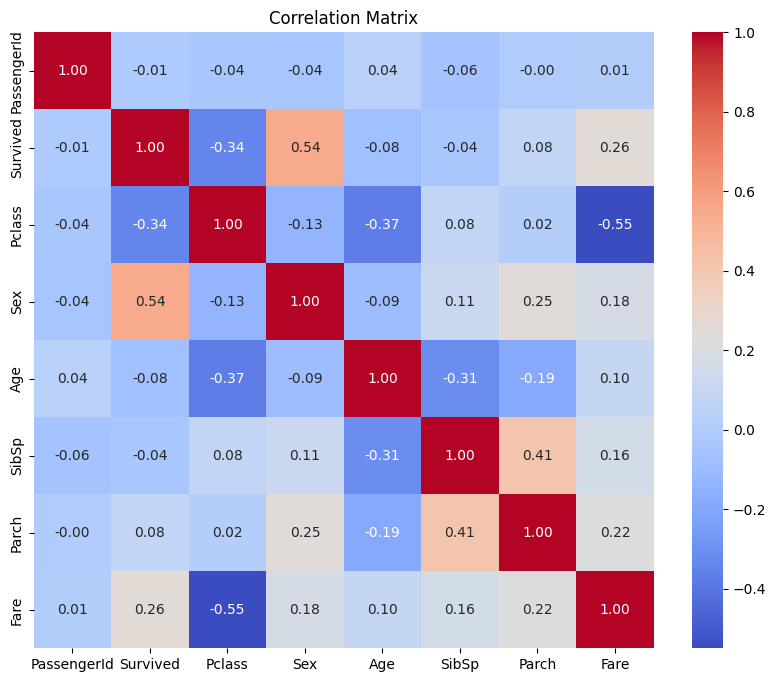

In [ ]:
# @title Correlation Matrix
data_f=data_f.replace('female',1)
data_f=data_f.replace('male',0)

corr = data_f.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
